<a href="https://colab.research.google.com/github/Fl4vinh0/financial-data-analysis_and_machine-leaning/blob/main/IAexpert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTAÇÃO DAS BIBLIOTECAS**

In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install -q yfinance
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

     |████████████████████████████████| 109 kB 7.5 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
     |████████████████████████████████| 6.4 MB 7.8 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


IMPORTAÇÃO DOS DADOS DO YAHOO FINANCAS

In [2]:
acoes = ['ABEV3.SA', 'ODPV3.SA', 'VIVT3.SA' ,'PETR3.SA', 'BBAS3.SA', 'BOVA11.SA']

CRIAÇÃO DA TABELA DOS VALORES DAS AÇÕES

In [19]:
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = yf.download(acao, start='2019-01-01')['Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [23]:
acoes_df = acoes_df.rename(columns={'ABEV3.SA': 'AMBEV', 'ODPV3.SA': 'ODONTPREV', 'VIVT3.SA': 'VIVO', 'PETR3.SA': 'PETROBRAS', 'BBAS3.SA': 'BB', 'BOVA11.SA': 'IBOVESPA'})
acoes_df

,AMBEV,ODONTPREV,VIVO,PETROBRAS,BB,IBOVESPA
Date,,,,,,
2019-01-02,16.150000,14.00,41.910000,26.650000,48.599998,87.900002
2019-01-03,16.330000,14.20,41.400002,27.200001,48.799999,88.000000
2019-01-04,16.549999,14.40,41.090000,27.510000,48.799999,88.500000
2019-01-07,16.480000,14.22,41.200001,28.400000,48.480000,88.480003
2019-01-08,16.150000,13.68,40.299999,28.250000,47.930000,88.830002
...,...,...,...,...,...,...
2022-04-06,14.950000,11.15,55.349998,34.939999,33.619999,113.870003
2022-04-07,15.060000,11.26,54.150002,36.689999,34.240002,114.650002
2022-04-08,14.930000,10.95,53.669998,37.090000,34.849998,113.980003


PROCURA POR VALORES NULOS

In [24]:
acoes_df.isnull().sum()


AMBEV        0
ODONTPREV    0
VIVO         0
PETROBRAS    0
BB           0
IBOVESPA     0
dtype: int64

DESCRIÇÃO DETALHADA DO DADOS COLETADOS

In [25]:
acoes_df.describe()

,AMBEV,ODONTPREV,VIVO,PETROBRAS,BB,IBOVESPA
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,16.038979,14.437860,46.089225,27.499668,38.188733,102.032524
std,2.162613,1.777622,3.480649,4.878248,8.771172,11.796815
min,11.030000,10.680000,40.000000,11.050000,22.129999,61.139999
25%,14.650000,12.990000,43.470001,23.639999,30.700001,94.349998
50%,16.100000,14.120000,45.340000,28.680000,34.200001,101.419998
75%,17.740000,16.049999,48.849998,30.650000,47.900002,111.099998
max,20.629999,18.430000,56.740002,37.520000,55.180000,125.750000


In [27]:
acoes_df.to_csv('acoes_dataframe.csv')

**SEABORN**


GRAFICO DE HISTOGRAMA

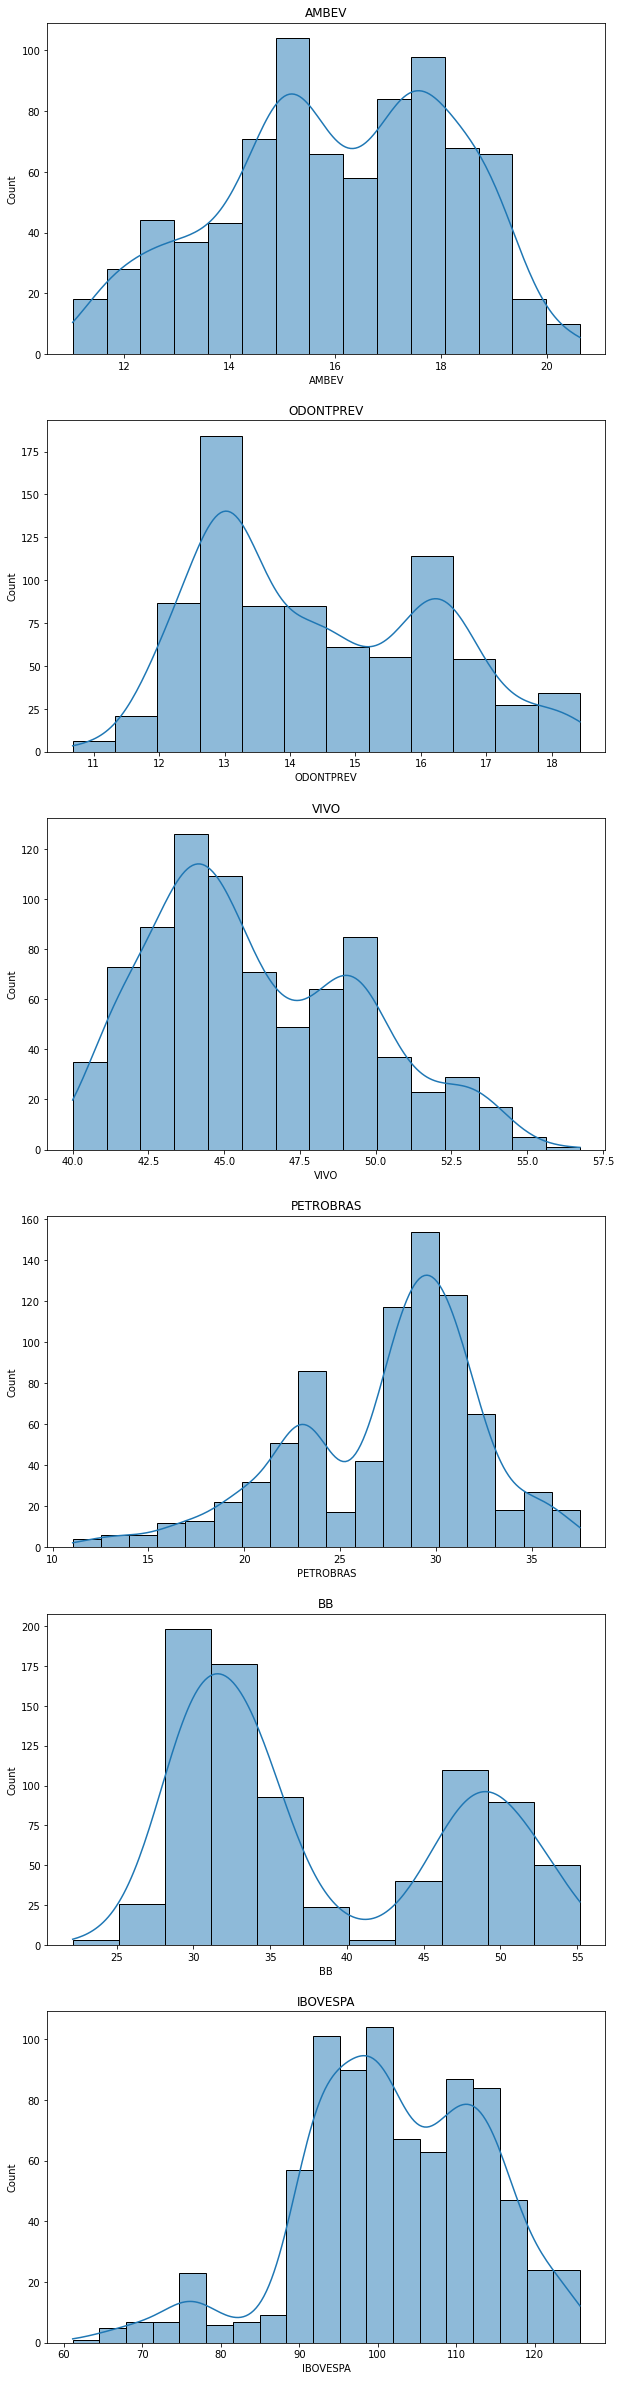

In [32]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(0, len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
  plt.title(acoes_df.columns[i])



GRAFICO BOXPLOT

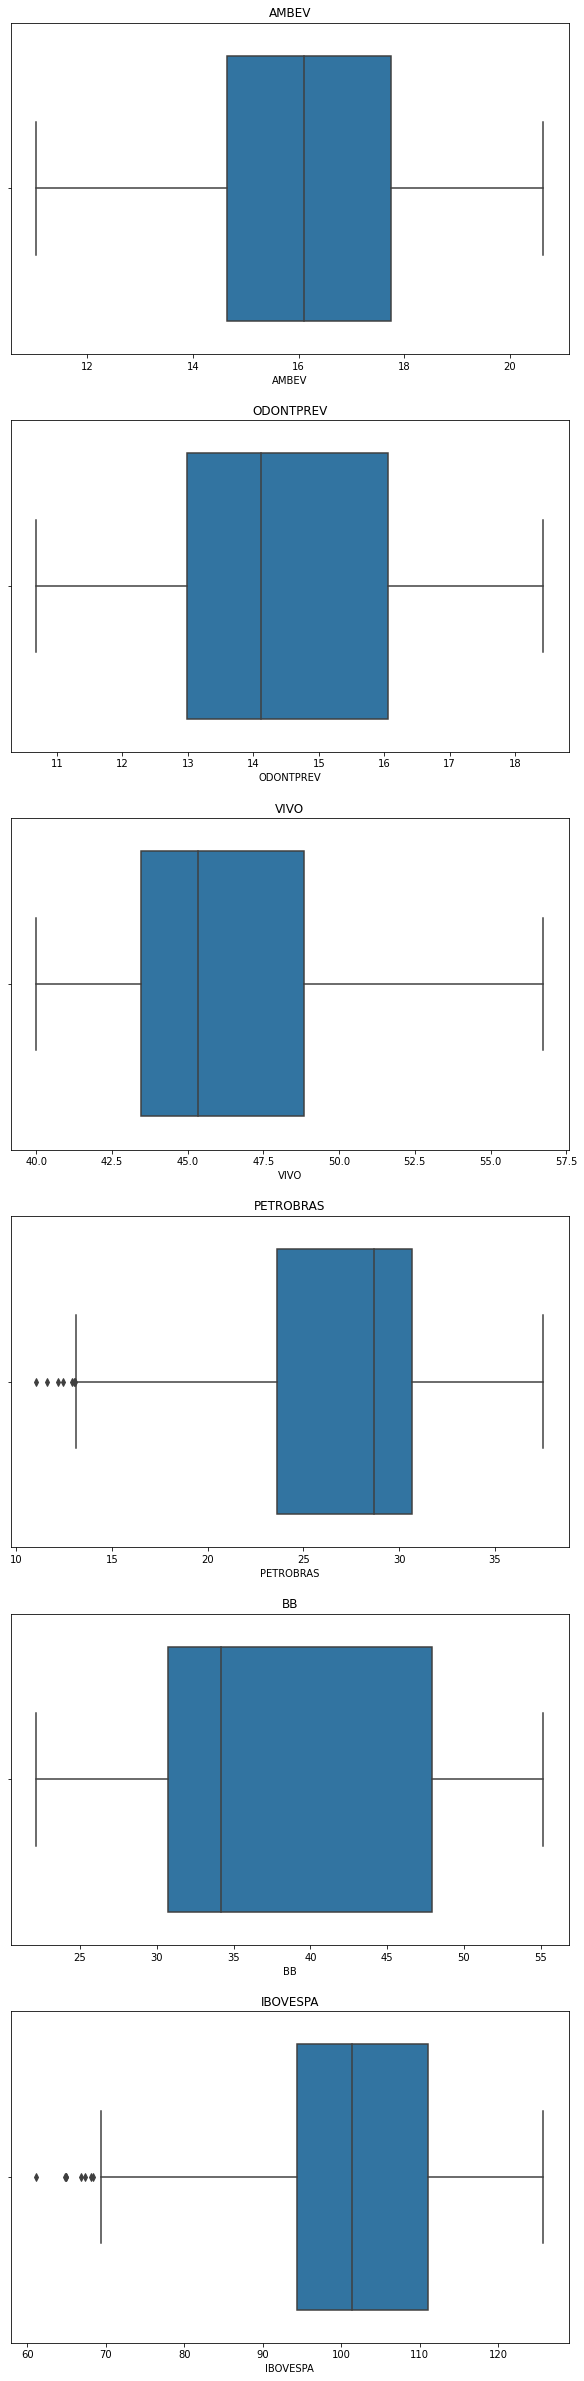

In [33]:
plt.figure(figsize=(10,50))
for i in np.arange(0, len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.boxplot(x = acoes_df[acoes_df.columns[i]])
  plt.title(acoes_df.columns[i])

GRAFICO DE LINHA

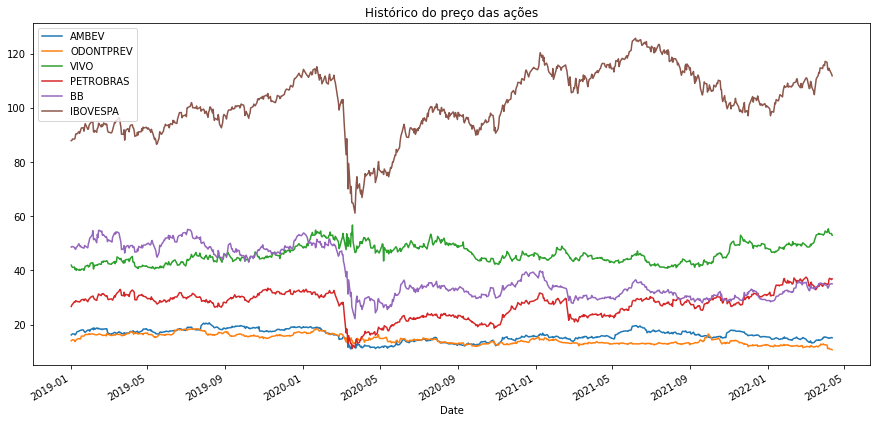

In [34]:
acoes_df.plot(figsize = (15,7), title = 'Histórico do preço das ações')

CRESCIMENTO PROPORCIONAL DAS AÇÕES

In [35]:
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns[0:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]
acoes_df_normalizado

,AMBEV,ODONTPREV,VIVO,PETROBRAS,BB,IBOVESPA
Date,,,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-03,1.011146,1.014286,0.987831,1.020638,1.004115,1.001138
2019-01-04,1.024768,1.028571,0.980434,1.032270,1.004115,1.006826
2019-01-07,1.020433,1.015714,0.983059,1.065666,0.997531,1.006598
2019-01-08,1.000000,0.977143,0.961584,1.060038,0.986214,1.010580
...,...,...,...,...,...,...
2022-04-06,0.925697,0.796429,1.320687,1.311069,0.691770,1.295449
2022-04-07,0.932508,0.804286,1.292054,1.376735,0.704527,1.304323
2022-04-08,0.924458,0.782143,1.280601,1.391745,0.717078,1.296701


CRESCIMENTO PROPORCIONAL DAS AÇÕES EM GRAFICO DE LINHAS

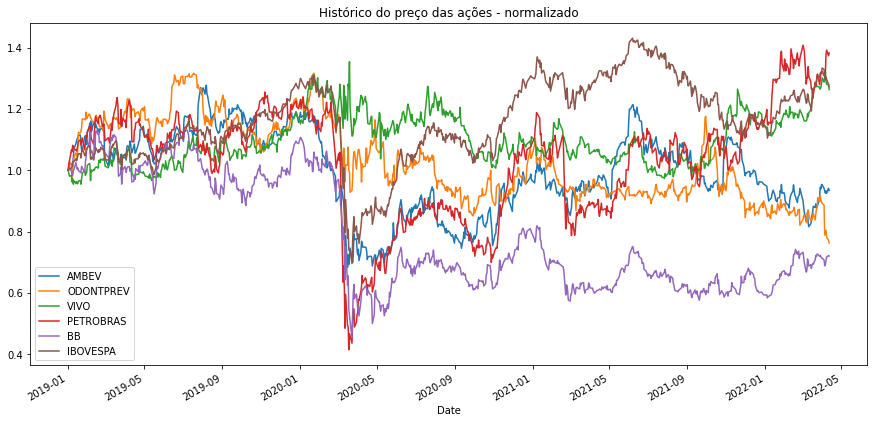

In [36]:
acoes_df_normalizado.plot(figsize = (15,7), title = 'Histórico do preço das ações - normalizado')

In [43]:
fig = px.line(title = 'Grafico de Ações')
for i in acoes_df.columns[0:]:
  fig.add_scatter(x = acoes_df['Date'],y = acoes_df[i], name = i)
fig.show()

ValueError: ignored